In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

import numpy as np
import torch
import gzip
import os
import pickle

import importlib
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

from sentence_transformers import SentenceTransformer 

/Users/willtong/Library/Caches/pypoetry/virtualenvs/wine-libraries-PLl6gzSz-py3.12/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
os.chdir('../../')

# importlib.reload(functions.similar_wines)
from functions.similar_wines import find_your_wine, info_features, most_similar_wine_within_dataset



[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [3]:
pwd

'/Users/willtong/Documents/AI_models/wine_review_model/wine_libraries'

In [4]:
df = pd.read_json("data/deduped_mod_winemag-data-130k-v2.json")

In [6]:
model_name = 'msmarco-distilbert-dot-v5'
model_path = "data/embedded_desc_newstopwds"+model_name.split("/")[-1]+".pckl"
text_tranformer = SentenceTransformer(model_name)

In [7]:

with gzip.open(model_path, "rb") as f:
    df_embeds = pickle.load(f)

# Here we created a scipt to allow the user to enter the wine that he likes.
# First, I want to see whether _cosine similarity_ or _Euclidean distance_ is a more effective similarity function.
# What you see below are three examples.  In all three cases, the cosine similarity is clearly better matched to the desirable factors in the input text.  In fact the _Euclidean distance_ responses are very generic and not specific to the input text at all.

In [8]:
your_wine_text = "robust red cherry vanilla cinnamon coconut nutmeg."
price_importance = 0.01
your_price = 30
your_price, your_wine_text

(30, 'robust red cherry vanilla cinnamon coconut nutmeg.')

In [9]:
print(your_wine_text)
df_merged = find_your_wine(df, your_wine_text, df_embeds, text_tranformer, 
                           your_price, price_importance, similarity_function = "distance")
top_10_indices = df_merged.index[:10]
df_merged[["merged_info_text", "price", "taster-name", "points", "desc_sim", "price_sim", "overall_similarity"
          ]].sort_values("overall_similarity", ascending = False).head(5)

robust red cherry vanilla cinnamon coconut nutmeg.
distance


,merged_info_text,price,taster-name,points,desc_sim,price_sim,overall_similarity
74215,"Twelve months bottle aging selection Touriga Nacional Alfrocheiro resulted powerfully structured wine. The wood aging still showing wine's toasty character hints dry extraction spoiling black fruit flavors. The wine integrate better develops, wait 2017. UDACA Sé Portugal Selection Red Dão 2011 Tesouro Private (Dão) Portuguese",26,Roger Voss,89,9.673704,0.994681,9.622248
25435,"This small appellation situated south north banks Garonne river near Agen. Using grapes three-year-old vines, wine ripe juicy red fruit flavors, layering acidity gives fresh aftertaste. Drink 2018. Brulhois (Brulhois) Labastide Orliac Château Red Blend Southwest France 2010",30,Roger Voss,90,9.571564,1.000000,9.571564
100111,"Still closed, take little time come shell. But worth wait: there's pepper, zestiness streamlined, structured body. One word comes mind: sleekness. Federspiel Jäger 2013 Wachau (Wachau) Klaus Austria Veltliner Grüner",30,Anne Krebiehl MW,90,9.447909,1.000000,9.447909
27205,"There's reduced quality wine much ado oak, spent time (30% new French). Founder winemaker Mark Lyon owns 122-acre site Sauvignon Blanc blocks date back 1973. A hit jalapeño dominates finish. Vine Sonoma California Valley Alexander Blanc Eco Terreno 2014 Barrel Old (Alexander US Sauvignon Fermented Valley)",22,Virginie Boone,83,9.604145,0.978893,9.401427
44947,"Karl Steininger's winery forms part new Loisium complex wine exhibition hotel Langenlois, designed New York architect Steven Holl (commemorated label). This wine comes adjacent vineyard. It's full, rich style, rounded, creamy apple flavors, touched white currant acidity. Glass stopper. 2007 Loisiumweingarten Steininger (Kamptal) Kamptal Austria Veltliner Grüner",23,Roger Voss,88,9.556070,0.983799,9.401256


In [10]:
print(your_wine_text)

df_merged = find_your_wine(df, your_wine_text, df_embeds, text_tranformer, your_price, 
                           price_importance, similarity_function = "cosine", output_verbose = True)
top_10_indices = df_merged.index[:10]
df_merged[["title", "merged_info_text",  "price", "taster-name", "points", "desc_sim", "price_sim", "overall_similarity"
          ]].sort_values("overall_similarity", ascending = False).head(5)

robust red cherry vanilla cinnamon coconut nutmeg.
cosine


,title,merged_info_text,price,taster-name,points,desc_sim,price_sim,overall_similarity
675,Acacia 2013 Pinot Noir (Carneros),"Smoky cinnamon nutmeg pierce entry wine, dense, full-bodied expression place. Layers rich cherry strawberry lie classic varietal earthiness, finishing medium length. Pinot Napa-Sonoma (Carneros) California 2013 Acacia US Noir Carneros",28,Virginie Boone,90,0.822354,0.998668,0.821258
20446,Golser Wein 2014 RW Limited Edition Red (Burgenland),"Vanilla cinnamon give fresh, full-fruited red notions plum ripe cherry generous feel. This easy drink easy like, lovely plush mouthfeel medium body. Its fresh core real bonus. Golser 2014 (Burgenland) Red Blend Burgenland Edition RW Limited Austria Austrian Wein",25,Anne Krebiehl MW,88,0.823981,0.991701,0.817143
119129,Merriam 2011 Windacre Estate Merlot (Russian River Valley),"Spicy cinnamon sultry tropical coconut, wine offers freshness red fruit, true varietal, soft, lean layers body weight. Sonoma Merriam California Valley Estate Valley) US 2011 Merlot River (Russian Windacre Russian",30,Virginie Boone,87,0.806991,1.000000,0.806991
14493,Hudson Shah 2012 Viognier (Red Mountain),"Aromas lees, apricot, vanilla wheat lead full-bodied fruit cinnamon flavors. It's fleshy feel flavor concentration there. 2012 Valley Viognier Washington Hudson US Red Shah Columbia Mountain (Red Mountain)",30,Sean P. Sullivan,84,0.804625,1.000000,0.804625
69030,Caernarvon Cellars 1999 Pinot Noir (San Lucas),"Quite rich viscous, full-blown core bright cherry herb flavors. Spice-like cinnamon nutmeg also find expression here, framed soft tannins. Good acidity holds together, finish pleasingly long. Pinot California Cellars Central Lucas San US Noir 1999 (San Coast Lucas) Caernarvon",26,,89,0.805438,0.994681,0.801154


In [11]:
your_wine_text = 'refreshing white with orange and peach'
price_importance = 0.01
your_price = 20
your_price, your_wine_text

(20, 'refreshing white with orange and peach')

In [12]:
print(your_wine_text)
df_merged = find_your_wine(df, your_wine_text, df_embeds, text_tranformer, 
                           your_price, price_importance, similarity_function = "distance")
top_10_indices = df_merged.index[:10]
df_merged[["merged_info_text", "price", "taster-name", "points", "desc_sim", "price_sim", "overall_similarity"
          ]].sort_values("overall_similarity", ascending = False).head(5)

refreshing white with orange and peach
distance


,merged_info_text,price,taster-name,points,desc_sim,price_sim,overall_similarity
55365,"All coming Block 95 winery's estate vineyard, beguiling wine complex range notes include caramel, spice, squash cream. It shows excellent balance, length finesse, enjoyment much mouth-feel flavor. Valley Horse Hills) (Horse US 2011 Crest Heaven Reserve Columbia Washington Hills Chardonnay",20,Sean P. Sullivan,91,9.188495,1.000000,9.188495
59475,"Grown clay chalk soil, second wine series three Moinié estate intended medium-term aging. With dark color solid tannins, certainly needs time. However, rich black fruit acidity already show structure. Give 2019, ready drink. Ponzac Patiemment Cahors (Cahors) 2015 Château Southwest France Malbec",23,Roger Voss,90,9.077824,0.995510,9.037065
27205,"There's reduced quality wine much ado oak, spent time (30% new French). Founder winemaker Mark Lyon owns 122-acre site Sauvignon Blanc blocks date back 1973. A hit jalapeño dominates finish. Vine Sonoma California Valley Alexander Blanc Eco Terreno 2014 Barrel Old (Alexander US Sauvignon Fermented Valley)",22,Virginie Boone,83,9.019562,0.998002,9.001541
53102,"Tight linear palate, evolving well $12 wine. Struck flint prominent nose, adding touch Old World character, flavors feature cut grass citrus. It's light bodied, remarkably intense finish. Drink now. (Marlborough) Blanc 2015 Zealand Stoneburn Marlborough Sauvignon New",12,Joe Czerwinski,88,9.288433,0.968507,8.995909
116109,"Controlled nose blackberry, mint, menthol fire. Like 2008, easiest road run, blast penetrating blackberry, boysenberry, heat, spice dark minty length. Tasty tough, roughness quality meeting middle. Drink couple years. Argentina 2007 Cafayate Tannat David Other Torino Don Michel Reserve (Cafayate)",17,Michael Schachner,88,9.025957,0.995510,8.985432


In [13]:

df_merged = find_your_wine(df, your_wine_text, df_embeds, text_tranformer, 
                           your_price, price_importance, similarity_function = "cosine")
top_10_indices = df_merged.index[:10]
df_merged[["merged_info_text", "price", "taster-name", "points", "desc_sim", "price_sim", "overall_similarity"
          ]].sort_values("overall_similarity", ascending = False).head(5)

cosine


,merged_info_text,price,taster-name,points,desc_sim,price_sim,overall_similarity
17664,"Fresh white peach orange blossom aromas waft start finish richly concentrated wine. The palate packed unctuous peach apricot flavors, streak lime acidity zesty citrus pith jolts finish. Nägler (Rheingau) 2013 Spätlese Riesling Rheingau Dr. Rüdesheimer Roseneck Germany Berg",26,Anna Lee C. Iijima,92,0.861072,0.982161,0.845712
78539,"Aromas white peach vanilla highlight rich-textured, rather full-bodied white wine. It's made generous rather crisp style, barrel fermented, buttery lushness defines fairly subtle fruit flavors. Very tasty overall. 2012 Dorado) California Viognier US Fields (El Foothills Four Sierra Dorado El",22,Jim Gordon,89,0.839756,0.998002,0.838079
25764,"Zesty lemon lime aromas add elegance unctuous white peach apricot flavors delicate, yet remarkably complex wine. Off-dry style, balances youthful fruit profile nuanced shades smoke earth. Nervy citrus acidity drives long, focused finish. 2012 Weis St. Mosel Urbans-Hof Germany Riesling Nik Alte Reben Ortswein Wiltinger Feinherb (Mosel) Kabinett",19,Anna Lee C. Iijima,91,0.830858,0.999500,0.830443
86110,"A touch peach colors white green fruit notes zippy white, freshness amplified slight spritz. It's light bodied, dry refreshing, lovely herbal edge palate. Niederösterreich 2016 (Niederösterreich) Jurtschitsch Terrassen Austria Veltliner Grüner",14,Anne Krebiehl MW,90,0.844913,0.982161,0.829841
4541,"Whatever varieties wine, disclosed, soft, ripe simple, orange, peach lime flavors. California Other 2011 Blend US (California) White Austerity",17,,82,0.831791,0.995510,0.828056


In [14]:
your_wine_text = "robust red cherry vanilla cinnamon coconut nutmeg."
price_importance = 0.01
your_price = 60
your_price, your_wine_text

(60, 'robust red cherry vanilla cinnamon coconut nutmeg.')

In [15]:

df_merged = find_your_wine(df, your_wine_text, df_embeds, text_tranformer, 
                           your_price, price_importance, similarity_function = "distance")
top_10_indices = df_merged.index[:10]
df_merged[["merged_info_text", "price", "taster-name", "points", "desc_sim", "price_sim", "overall_similarity"
          ]].sort_values("overall_similarity", ascending = False).head(5)

distance


,merged_info_text,price,taster-name,points,desc_sim,price_sim,overall_similarity
38538,"The large 246-acre estate owned Countess Noemi Cinzano, vermouth family. With Giacomo Tachis consultant, vineyard produced powerful, rich wine combines dryness, bitter fruits dark tannins generous tarry, super-ripe fruit promises come dominate wine ages. Drink 7–8 years. Tuscany Italy Sangiovese Argiano Brunello 1997 Montalcino Tenuta",56,Roger Voss,92,9.813903,0.997337,9.787767
82450,"The new Oregon project John Abbott (ex-Abeja) kicks vineyard selection five-star vintage. A blend fifth leaf Pommard 30-year-old Wädenswil clones, lush aromatic, sporting bold scents flavors ripe raspberry cherry fruit, spine iron. Toasty new barrel accents punch through, clean crisply defined finish. 2012 Pinot Freedom Hill Vineyard Other Devona US Noir Oregon (Oregon)",50,Paul Gregutt,92,9.629883,0.983471,9.470715
117859,"This includes grapes winery's Jerusalem Hill vineyard Eola-Amity Hills AVA, addition Dundee Hills sites, hence general Willamette Valley designation. It aged 65% new French oak 16 months. It's open generous, offering bright berry, cherry red currant fruit matched defining acids, set fine-tuned frame new oak. Re-tasted 24 hours opened, remained fresh, dense satisfying. 2012 Pinot (Willamette Valley Serene Evenstad Willamette US Noir Oregon Reserve Domaine Valley)",70,Paul Gregutt,94,9.600929,0.983471,9.442240
6450,"Here's beautiful interpretation 2008 vintage shows balance, harmony intensity zipped one tight package. That seamless integration, followed rich extraction, gives wine momentum overall. Although different wine past vintages, quality high. Hold 5–10 years. Tuscany Italy Sangiovese Brunello Montalcino 2008 Grosso Uccelliera",65,,94,9.465274,0.995842,9.425917
76398,"Coming winery's SJR Vineyard The Rocks District, blockbuster wine displays savory aromas green olive, sea breeze, smoked meat, peat earth along coffee plum. The palate shows great concentration richness also deftness, delineation precision. It's complete head turner shows true sense place. Syrah (OR) 2012 (OR)) Valley Other (Walla US Walla Delmas Oregon",65,Sean P. Sullivan,94,9.433695,0.995842,9.394470


In [16]:
print(your_wine_text)
df_merged = find_your_wine(df, your_wine_text, df_embeds, text_tranformer, 
                           your_price, price_importance, similarity_function = "cosine")
top_10_indices = df_merged.index[:10]
df_merged[["merged_info_text", "price", "taster-name", "points", "desc_sim", "price_sim", "overall_similarity"
          ]].sort_values("overall_similarity", ascending = False).head(5)

robust red cherry vanilla cinnamon coconut nutmeg.
cosine


,merged_info_text,price,taster-name,points,desc_sim,price_sim,overall_similarity
104654,"This bottling iconic vineyard subtle yet steady nose, cinnamon nutmeg spice giving character red-cherry base. The vibrant palate keeps mouth watering, showing clove nutmeg atop sharper cranberry warmer cherry fruit tones. Pinot California Valley 2014 Tantara Talley Central Rincon US Noir (Arroyo Coast Arroyo Valley) Grande",65,Matt Kettmann,91,0.800796,0.995842,0.797466
40353,"A dash spicy oak suggests nutmeg cinnamon aroma well-balanced, rich flavorful wine. Cherry, red currant touches mint cedar fill palate, texture firm enough, fine tannins great balance. Pinot California Valley 2013 Anderson US Noir La Crema Valley) (Anderson",50,Jim Gordon,92,0.809349,0.983471,0.795972
30925,"Unctuous mango peach flavors accented hints candle wax dried herbs delicate intensely concentrated Riesling. Silky sweet texture, brightened streaks orange acidity touches saffron lemon peel linger finish. Jakob Auslese (Rheingau) Oestrich Kühn Peter Riesling 2011 Rheingau Germany Lenchen",65,Anna Lee C. Iijima,91,0.795324,0.995842,0.792017
76130,"Decadent aromas cherry candy vanilla cookies emerge blend 55% Carignane, 22% Zinfandel, 12% Cab Franc (all three estate) 11% Syrah (from Coast View Vineyard Monterey). The jammy palate similarly rich, bordering sweet, cherry compote, ripe cranberries, vanilla charred meats. California Montmarte Cruz Central (Santa Mountains) Savannah-Chanelle US Red Blend 2009 Coast Mountains Santa",60,Matt Kettmann,88,0.791768,1.000000,0.791768
89973,"Cocoa, nutmeg cinnamon aromas, generous broad fruit flavors like blackberry jam dried black cherries fill full-bodied wine. The silky texture backed fine tannins, lingering finish echoes fruit chocolaty spices. Syrah California Other 2011 US Effect Conoscenti (California) Galatea",65,Jim Gordon,89,0.795010,0.995842,0.791704


# Impact on price importance factor

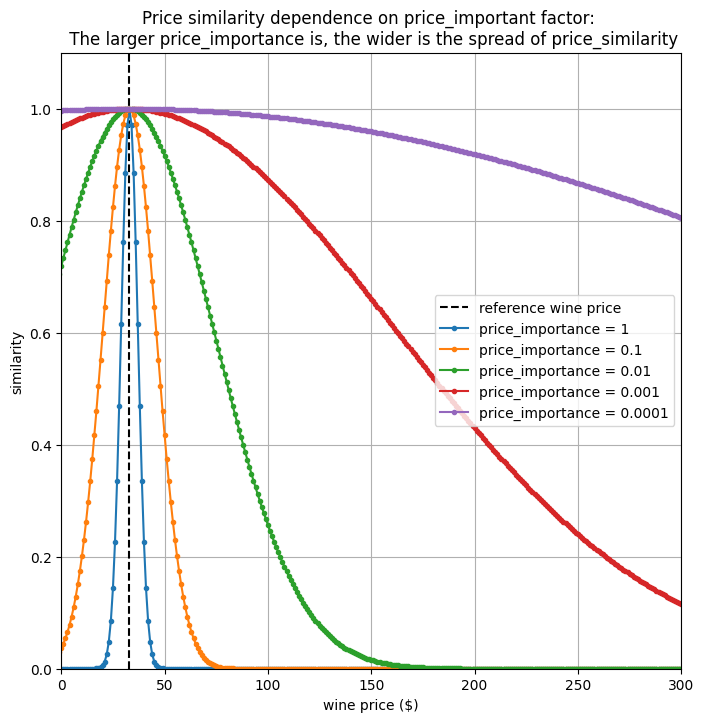

In [18]:
wine_of_interest_price = 33
prices = range(-wine_of_interest_price, wine_of_interest_price * 10)
plt.figure(figsize = (8,8))
plt.plot([wine_of_interest_price, wine_of_interest_price], [0, 1.2], ls = "--", label = "reference wine price", color = 'black')
plt.title("Price similarity dependence on price_important factor: \n The larger price_importance is, the wider is the spread of price_similarity")
for price_importance in [1, 1e-1, 1e-2, 1e-3, 1e-4]:
    prices_sims = []
    for price in prices:
        prices_sims.append(np.exp(-np.square(wine_of_interest_price - price)*price_importance/wine_of_interest_price))
    plt.plot(prices, prices_sims, marker=".", ls = '-', label = "price_importance = " + str(price_importance)) 
    # plt.scatter(prices, prices_sims, marker = '.', '--')
plt.xlabel("wine price ($)")
plt.ylabel("similarity")
plt.grid()
plt.ylim(0,1.1)
plt.xlim(0,300)
plt.legend()
plt.savefig("images/price_similarity_impact.png", format="png")
plt.show()

## An example of how text and price similarities leads to overall similarity
## desc_sim * price_sim = overall_similarity

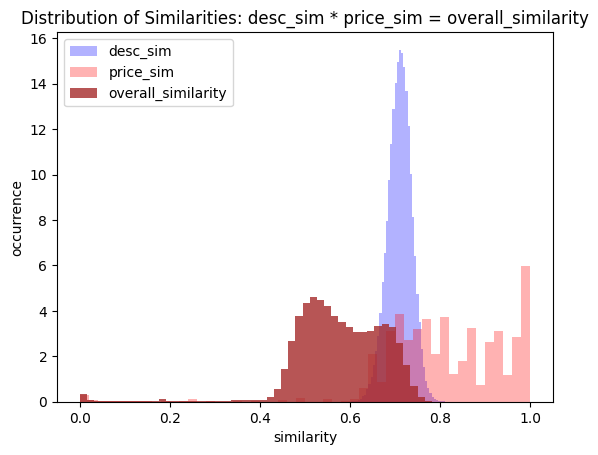

In [21]:
step = 0.01
features = ["desc_sim", "price_sim", "overall_similarity"]
colors = ['blue', 'red', 'brown']
plot_params = [x for x in zip(features, colors)]
plt.title("Distribution of Similarities: desc_sim * price_sim = overall_similarity")
for plot_param in plot_params[:2]:
    feature, color = plot_param 
    plt.hist(df_merged[feature], 50, alpha = 0.3, label = feature, color = color, density = True)
feature, color = plot_params[2] 
plt.hist(df_merged[feature], 50, alpha = 0.8, label = feature, color = color, density = True)
plt.legend()
plt.xlabel("similarity")
plt.ylabel("occurrence")
plt.show()